# 104人力銀行網站爬蟲練習
## 從104人力銀行網站爬取求職公司資訊。

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 首先進入104人力銀行網站：https://www.104.com.tw/cust/list/index/
### 在"地區"及"產業"下拉式選單中，選擇你希望的選項，然後按下"找公司"按鈕。

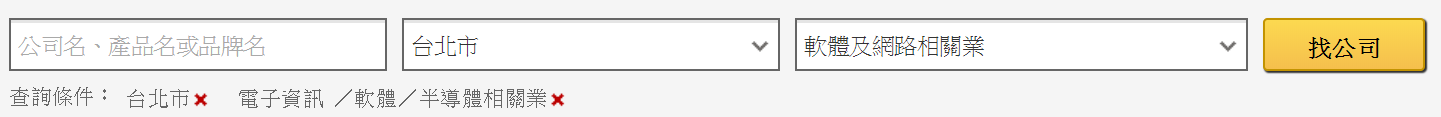

### 開啟新網頁後，觀察新的網址內容，把網址複製下來。

In [2]:
job_104_url = "https://www.104.com.tw/cust/list/index/?page=1&order=1&mode=s&jobsource=checkc&area=6001001000&indcat=1001002000"

### 開始爬取搜尋結果

In [41]:
browser = webdriver.Chrome(executable_path='/Users/ben/webcrawler/chromedriver')
browser.get(job_104_url)  # 打開瀏覽器並連到網頁
time.sleep(2)  # delay一段時間等待網頁更新完成

while True:
    time.sleep(3)  # delay一段時間等待網頁更新完成
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    company_list = soup.find_all("div", class_="company-list-desktop semiconductor w-100 py-4 container-fluid border-bottom company-lists__list")
    
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.find('div',class_='info-job text-break mb-2').find('a').text
        f = open("company_list.txt", "a+", encoding='utf-8')
        print(company_name)        
        f.write( company_name + "\n" )  # 寫入公司名稱

        company_desc = company.find("div", class_='info-description text-gray-darker t4 text-break mb-2 position-relative info-description__line2').text
        print(company_desc)
        f.write( company_desc + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()
        
    company_list_2 = soup.find_all("div", class_="company-list-desktop w-100 py-4 container-fluid border-bottom company-lists__list")
    
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list_2:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.find('div',class_='info-job text-break mb-2').find('a').text
        f = open("company_list.txt", "a+", encoding='utf-8')
        print(company_name)        
        f.write( company_name + "\n" )  # 寫入公司名稱

        company_desc = company.find("div", class_='info-description text-gray-darker t4 text-break mb-2 position-relative info-description__line2').text
        print(company_desc)
        f.write( company_desc + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()

    try:
        next_disable = soup.find("div", class_='pagination mx-auto my-4 text-center').find_all('a',class_='paging__link d-block position-relative')[-1]['href']
        print(next_disable)
    
        if next_disable != None:
            job_104_url2=job_104_url.replace('?page=1',next_disable+'&order=1&mode=s&jobsource=checkc&area=6001001000&indcat=1001002000')
            browser.get(job_104_url2)
        else:
            print('==========沒有下一頁了==========')
            break
    except:
            print('==========沒有下一頁了==========')
            break
            
    '''
    
    接下來請學員練習，定位到「下一頁」按鈕。(可以利用find_element_by_link_text("xxx")的函式)
    如果還有下一頁，利用Selenium模擬click「下一頁」按鈕的動作。(定位到物件後，利用其click()屬性)
    若沒有下一頁了，離開爬取的流程
    
    Your code here
    
    '''
    

<ipython-input-41-6f762a952217>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path='/Users/ben/webcrawler/chromedriver')


日立先端科技
全球前十大半導體設備商，以在台紮根的企業心態與全體員工一起努力！
台灣先藝科技
先藝科技為全球半導體設備商的佼佼者，想開拓國際視野嗎？來ASM就對了！
聯發科技
聯發科技為全球第四大IC設計公司，我們相信科技能使人們創造無限可能！
達信傳訊股份有限公司
1、成立於1990年從事專業委外客服中心服務
2、擁有國家通訊傳播委員會電信工程業登記執照
3、每月教育資訊網通知識及客服检討教育
4、本公司提供最佳工作環境場所及客戶服務平台
5、提供24H委外客戶客製化客服及監控中心服務
6、2019年6月再度通過ISO9001：2015客服品質認證，客服品質政策評 鑑為優等
7、員工享有多項獎金制度及完善教育訓練升遷考核評鑑制度
8、擁有資訊網通最好客服經驗分享，外商的最愛，歡迎有志樂於客服工作、客服管  理者，學習成長，進階為客服主管最佳機會。
     

博世科智能股份有限公司
我們是新創公司, 致力於工業4.0的先驅行列, 研發製造創新技術產品. 好的工作環境和高待遇不是我們要提供給你, 我們給你的是一個創新挑戰的機會, 一個無窮潛力的市場. 歡迎加入我們一起投入工業4.0, 智能製造!
        
博世科為工業物聯網領導廠商，並建立全球第一個商業化工業物聯網服務平台,大量佈建於工業應用，博世科的Machinelink 通訊協議與軟硬體架構具有多項專利，可適用於各種廣域低功耗網路，以超過 99.9%的穩定度協助客戶進行高密度與大量端點的資料採集與控制,透過大量數據匯流與大數據分析，可針對產業應用， 設備，環境進行常態性預測，系統並可結合ERP或MES與開放資料進行動態成本分析, 預測, 風險管理,智慧加值應用，協助產業智能化。

        As a leading Industrial IoT company, blutech has built world first commercial IIOT 
platform deployed in industries, our patented machine-link protocol and hardware / 
software architecture could be adopted in all low power wide area network protocol, 
feat

欣興電子
世界第一IC載板供應商
日立先端科技
全球前十大半導體設備商，以在台紮根的企業心態與全體員工一起努力！
台灣先藝科技
先藝科技為全球半導體設備商的佼佼者，想開拓國際視野嗎？來ASM就對了！
綠頁有限公司
Deltapath INC 總公司設立在美國舊金山，全球分公司有日本(東京)、台灣(台北)、香港、紐西蘭(奧克蘭)、菲律賓(馬尼拉)、大陸(上海、深圳)。

Deltapath 台灣設立辦事處已成立六年，主要服務的客戶有政府、學校、醫院、大型企業等，Deltapath 專研在通訊領域上已經有20年，Deltaapth UC Platform 運用在不同的通信平台、影音設備、VOIP 電話、電腦軟體電話和行動APP，結合在一起的解決方案，旨在讓通信變得更容易且直觀，運用上更靈活彈性。

Deltapath 相信，每個解決方案都應體現簡單性，並在適當的時候為用戶提供合適且觸手可及的通信方式。

2021年要擴大服務台灣的客戶及找尋台灣的人才，Deltapath重視每一位員工，除了提供良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入Deltapath的工作行列。

亞太電信股份有限公司
        亞太電信股份有限公司於2000年成立，自2014年起以「Gt智慧生活」為品牌發展核心，以行動、數位、寬頻做為業務發展重心，致力開創多元智慧應用，積極轉型為「新科技服務營運商」。

        營運迄今一路走來，亞太電信全力落實創新資費、多元產品及貼心服務，除了提供高品質的4G行動語音與網路服務，並積極跨入5G通訊新世代，結合鴻海科技集團研發及豐厚製造實力與資源，持續強化技術研發、基礎網路架設、應用服務整合、客戶開發及營運4大核心競爭力，致力深耕智慧製造、能源、交通、醫療、零售、娛樂等六大領域，以全新科技視野展望未來，持續推動智慧生活，創造更多無限可能。


伸波通訊股份有限公司
Wave-In Communication Inc. is a company combined field experienced experts, leading solution architect, intelligent R&D and capable manufacture. We provide total solution to customer, from

美商德州儀器
全球類比IC龍頭企業，獲選Forbes 新鮮人最佳雇主！
KLA 科磊
全球半導體製程控制領導者，財富五百強企業，世界級研發團隊驅動未來智慧生活
應用材料
全球最大半導體與顯示器設備商，長達27年半導體設備營收第一！
昱樺科技股份有限公司
憑藉著在IP乙太網路產品行業的長期背景，Lantech可以為工業和IP網絡提供最佳的解決方案。Lantech集團致力於為我們的全球的合作夥伴，提供功能豐富、性能卓越的解決方案及服務。Lantech的核心競爭力是網路軟體和硬體，這使得我們可以為不同的網路環境提供齊全、多樣的產品和服務。包含：


 軌道交通系統
 大樓自動化
 工廠自動化
 石化工業
 巴士網路
 隧道交通監控
 風力發電監控
 電力設備
 海上平台
 船舶
 水處理廠
 ISP基礎建設
 安防監控

Lantech產品遠銷世界各地，我們在台灣、美國、德國的銷售團隊以客戶為中心提供高品質的產品和服務。結合優質的產品、服務和通路合作夥伴的知識和努力，Lantech可以為任何一個工業和IP 網絡提供性價比極高的產品和服務。


Lantech已經成功的在全球範圍內開展了乙太網路業務，包括芬蘭的路面電車系統、越南的軍事坦克系統、德國造船公司的雷達系統、馬來西亞的無線城市監控系統、韓國高速公路的標示系統、羅馬尼亞的HD城市監控系統等等。
碩為科技股份有限公司
我們是一家新創公司。核心團隊為紅點設計師事業群之生物科技產品核心團隊，成員擁有平均20年產業資歷，近年來除了成立自己的女性美妝美容新創品牌外，也投入高端科技產品研發，成功發展出世界第一頂量產上市的AI智慧智能發展，在技術和實務上都有堅強實力與經驗，致力於將新世代的智能科技、美妝帶入全民生活。然而多年來團隊成員一直在思考真正兼具台灣價值、市場需求以及能夠開創美好未來的產品。經過多方考量以及資源整合，由初期生物科技研發轉型成多元化國際貿易整合行銷業務，

我們在乎客戶需求，客戶滿意是我們的目標，專業團隊細心對應各階段作業，提供跨國供應鏈的創新整合。
以創造合作夥伴和強化合作鏈為核心價值，發揮全盤並系統性地整合功能。
我們也一步一腳印在各領域成為國內外國際貿易的重要夥伴，成為眾多品牌及供應商長期合作策略夥伴。



Adam Elements International Co., Ltd._亞果元素國際股份有限

義為
專注最先進科技開發服務，提供客製化精密材料、關鍵組件和製造技術。
美商德州儀器
全球類比IC龍頭企業，獲選Forbes 新鮮人最佳雇主！
KLA 科磊
全球半導體製程控制領導者，財富五百強企業，世界級研發團隊驅動未來智慧生活
新通環宇股份有限公司
NewComm Global is an Asian-focused international carrier providing global connectivity services to carriers and service providers. 
Holds Type II licenses in Taiwan
同步科技股份有限公司
你是否有滿腔的熱血及源源不絕的創意？

Sync Lab 同步科技透過行銷力、內容力、設計力、開發力等四大面向：

從替客戶設計開發出符合需求的產品一路到行銷以及後續的維運，提供一條龍式的完整服務。

與許多新創公司相同、公司組織扁平化，並沒有太多的上下關係。

工作氛圍輕鬆，不會每天有主管一直盯你，但我們對於工作有非常高的標準要求。

除了提供福利與薪資外，我們尤其著重團隊成員的成長與生涯規劃，並且定期與團隊成員review目前的狀況以及對未來的想法，確保員工能與公司一起成長。 我們也在未來可以想像的公司發展上，規劃團隊成員職涯發展，與團隊成員溝通，你是否想要往這個職缺發展，以及需要具備的能力與成長的幅度。

歡迎具備專業能力、對於未知與創新充滿熱情、具備獨立思考、樂於溝通並能夠自我驅動的優秀夥伴加入我們的團隊，一起互相學習、跟著公司及所有夥伴一起共同成長！


【薪資類】
◆ 具市場競爭力的薪資

【請/休假制度】
◆ 週休二日
◆ 年假比照勞基法給予

【訓練發展】
◆ 暢通的升遷管道（每半年一次升遷考核）
◆ 可與國外同事業務交流

【獎金/禮品類】
◆ 年終獎金 (依個人績效及經營狀況發放)
◆ 三節獎金 (依公司營運狀況評核發放績效獎勵)

【休閒/其他類】
◆ 尾牙、春酒活動
◆ 不定期部門聚餐
◆ 年輕團隊、人性化管理
◆ 上班環境開放，尊重所有員工
◆ 辦公室不定時提供咖啡、飲品、零食
彩富電子股份有限公司
彩富電子是全球領先的網路視頻產品設計製造商，致力於不斷提升網路處理技術、視頻處理技術及視頻演算法，面向世界提供尖端創新的安防產品，專業的企業解決方案

義為
專注最先進科技開發服務，提供客製化精密材料、關鍵組件和製造技術。
美商德州儀器
全球類比IC龍頭企業，獲選Forbes 新鮮人最佳雇主！
KLA 科磊
全球半導體製程控制領導者，財富五百強企業，世界級研發團隊驅動未來智慧生活
遠傳電信股份有限公司
遠傳電信為國內資通訊與數位應用服務之先驅，以「誠信、敏捷、創新、團隊合作」為核心價值，自1997年成立以來，遠傳致力拉近人與人的距離，實現「只有遠傳 沒有距離」。
在邁向5G新世代之際，遠傳不再只是電信，於2019年重新詮釋品牌宣言，以「靠得更近 想得更遠」設下全新里程碑，希冀透過大數據、人工智慧及物聯網等數位應用，不只拉近彼此心的距離，更要縮短人們與「新科技」的距離。
三傑物聯科技股份有限公司
公司創立於民國105年
主要從事無線物聯網業，擁有為數不少的客戶群。
本公司擁有優秀的經營團隊，秉持著「創新及服務」的經營理念，追求企業永續經營成長。
我們重視每一位員工，有良好工作環境，也提供學習及成長空間，歡迎優秀的朋友一起加入。
台灣大哥大文山興隆特約門市_全首通信有限公司
本公司是成立13年的台哥大特約門市,從事通訊商品之銷售及服務
Asurion Taiwan_香港商亞勝通訊有限公司台灣分公司
關於亞勝
亞勝集團是世界領先的消費產品及移動手機保護服務的提供商，總公司位於美國。亞勝集團為消費者提供支持，以幫助消費者在電子產品使用中獲得最佳利益，確保其隱私安全。一旦消費者產品遺失、被偷、損壞或出現故障，快速的更換或維修服務，使消費者時時安心。作為優秀的技術保障提供商，公司現已與世界頂級的運營商、零售商和金融服務機構達成戰略合作夥伴關係，全球擁有超過11,000名員工，專注於滿足超過2億5千萬消費者的需求。請瀏覽www.asurion.com獲取更多信息。


本公司產品＂全方位手機保障服務＂榮獲2016年第17屆金鋒獎殊榮!

For the past 20 years, Asurion has helped people across the globe balance the interdependency between life and technology. 
Today, as the industry-defining leader of technology solutions, we ensure 3

台灣先藝科技
先藝科技為全球半導體設備商的佼佼者，想開拓國際視野嗎？來ASM就對了！
聯發科技
聯發科技為全球第四大IC設計公司，我們相信科技能使人們創造無限可能！
創意電子
快來加入IC設計服務領導廠商，創意要和你一起領先全球
澳歐國際股份有限公司
澳歐國際為專業監控品牌安裝及專案規劃廠商,主要提供監控設備安裝服務及國內/外監控專案規劃服務,我 們重視每一位員工，有良好工作環境，也提供學習及成長空間，歡迎優秀的朋友一起加入。 企業使命–讓每一個人生命及財產更有保障。 經營理念 安全：致力提升安全監控事業的發展，降低犯罪發生。 價值：提供最有價值的產品與服務，以滿足顧客需求。 共享：達成企業成長與利潤目標，讓顧客、員工、股東、社會，共享繁榮。 企業文化 真誠：真實面對自己，誠懇對待別人，以改善自己，受到幫助及尊敬。 專業：不斷訓練，終身學習，以精進專業能力，提升工作績效。 企圖心：正面思考，旺盛的企圖心，以帶領團隊勇往直前，達成目標。
台灣固網股份有限公司
台灣固網成立於2000年，隔年取得綜合網路業務特許執照。2004年，台灣固網為第一家股票上櫃的民營固網公司，也是第一家興櫃市場中無實體交易公司。2007年台灣大哥大整併台灣固網、台灣電訊與富陽科技媒體，集團服務內容涵蓋行動通訊、固網、寬頻上網與有線電視，達成全面性的電信資源整合。對於企業客戶的電信需求，台灣大哥大集團持續耕耘且不斷改革，並於2013年7月推出「台灣大哥大商務服務」品牌。

台灣大哥大商務服務持續投資創新服務以滿足客戶，包含2013年11月台灣首座世界級雲端機房啟用，以及2014年推出高度資安保障的M+企業即時通訊方案。展望未來，台灣大哥大商務服務仍將以誠信、親切、專業、創新的態度和理念與企業客戶打拼在一起，積極落實提供值得信賴的企業電信服務，並協助客戶掌握趨勢，打造競爭優勢。

台灣固網擁有豐富的電信經營經驗培養精銳的電信專才，聯合國際資源，組成頂尖的策略、技術聯盟以世界級的光纖寬頻，建構台灣成為高速化、網路化的智慧島、科技國。深耕台灣，逐鹿全球，不僅要成為台灣第一、最大、最好的電信集團，更希望成為亞太區域的電信網路樞紐，世界頂級的電信集團。 現在就是未來，現在就是先機，加入台灣固網，躋身世界級團隊就是現在。我們是電信服務的創新者，歡迎各界菁英同行。
台灣大哥大股份有限公司
台灣大哥大於1997 

義為
專注最先進科技開發服務，提供客製化精密材料、關鍵組件和製造技術。
美商德州儀器
全球類比IC龍頭企業，獲選Forbes 新鮮人最佳雇主！
KLA 科磊
全球半導體製程控制領導者，財富五百強企業，世界級研發團隊驅動未來智慧生活
凱士網路工程有限公司
我們重視每一位員工，除了有良好工作環境、也提供學習及成長的空間，歡迎優秀的朋友一起加入凱士網路工程有限公司的工作行列。
萬欣網路科技有限公司
萬欣公司擁有多年網站和App開發經驗，以成為專業之「商業WEB/APP開發設計商」角色自期，強調以直覺、人性化的操作介面來協助管理者，並提供智慧平台作網路趨勢分析。

萬欣公司同時秉持著，考量「使用者便利性」、「管理者便利性」、「視覺性」、「實用性」之角度，提供企業客製化的製作服務，藉以協助在市場上走出差異化並取得市場競爭優勢，進而建立品牌形象。

我們要找的是有野心、有膽識、有創業想法、勇於自我挑戰、熱愛學習新技術的人才。只要有能力、態度好、肯學，願意跟著我們一起努力、一起成長的人，我們都非常歡迎。

 萬欣網路科技是能讓您大展身手的極佳平台，誠摯地邀請您的加入。
勁澤科技股份有限公司
勁澤科技主要有兩大核心業務 : 代理與外銷代工

#亞太區域代理業務 :
為美國網路測試儀器大廠T3 Innovation與Platinum Tools的亞太區域總代理，負責提供包含東北亞、東南亞與紐澳等國家經銷商在產品與行銷上的支援。

#外銷代工與研發 :
專攻網路結構化佈線相關產品，包含專業手工具、接頭與專業化配件，客戶包含歐洲、美國等市場領導品牌，協助客戶進行產品的設計、開發與生產。
(ETS-LINDGREN TAIWAN, LLC )美商伊特林台灣有限公司
ETS-Lindgren Inc. is a subsidiary of ESCO Technologies Corporation (NYSE symbol ESE).
Headquarters: Cedar Park, Texas, USA
Company Size: 501-1,000 employees
Website: http://www.ets-lindgren.com
Industry: Electrical/Electronic Manufacturing
Founded: 1995
Type: Public 

義為
專注最先進科技開發服務，提供客製化精密材料、關鍵組件和製造技術。
美商德州儀器
全球類比IC龍頭企業，獲選Forbes 新鮮人最佳雇主！
KLA 科磊
全球半導體製程控制領導者，財富五百強企業，世界級研發團隊驅動未來智慧生活
新加坡商博思達有限公司台灣分公司(An affiliated of Softbank group)
Brightstar 是世界第一的專業無線產品經銷商暨全球領先的創新及多樣化無線產業服務公司，致力於提升無線設備價值鏈關鍵參與者的表現和業績，目前合作方案已進入超過25個國家，而且其供應鏈、財務、設備保險和保護，全通路和行動數位解決方案仍不斷地擴張至新的國際市場。               
Brightstar設備分銷服務的規模仍在全球居於首位，其業務遍佈100多個國家。如今，Brightstar也是全球行動裝置配件的最大分銷商之一。

網站可參考:http://www.brightstar.com/
倍思科技有限公司
成立時間 ： 西元2013年
經營理念 ：
我們不怕比較，因為我們把最大利潤留給您，只要您肯吃苦(有日曬雨淋心理準備)丶肯付出(重視團隊合作)丶想賺錢(我們提供您極具競爭力待遇)丶想學一技之長(我們不問學歷但重視態度)，我們會給您舞台發揮.目前我們已有20位夥伴，平均年齡不到30歲，是個年輕有活力丶夥伴彼此相互扶持的公司，我們經營理念是共同經營，利潤共享!
企業文化 ：
我司主要是負責有線電視數位機上盒安裝工程業務，目前外勤工程師已有10位以上，其中有一半以上剛入行沒有經驗，經過我們培訓後第二個月至少都有4萬以上， 勤奮的月入6萬以上不是問題，除可擁有一技之長外，也是個肯付出就有收獲的工作，非辦公室內死薪水!
赫徠森國際企業有限公司
目前行動上網已經是世界趨勢，然而各家電信公司的國際漫遊不僅結構複雜，並且往往費用高昂……基於這些理由，過去在國外使用網路仍受到不少限制。台灣位於亞洲經濟重地，許多人以此為據點朝世界發展，因此我們希望能提供各位操作簡單、便利，又可高速上網的小型Wi-Fi。基於這樣的願望，HORIZON推出租用Wi-Fi，並於2013年，在台北成立了第一個據點。2014年9月在香港成立了分公司。將陸續持續規劃擴張與發展。
太宏通訊科技股份有限公司
以客為尊的服務態度，使客戶感受到公司“顧客至上”、“客戶為先”的

聯發科技
聯發科技為全球第四大IC設計公司，我們相信科技能使人們創造無限可能！
創意電子
快來加入IC設計服務領導廠商，創意要和你一起領先全球
美商科林研發
美國《財星Fortune》雜誌前500大企業全球最受尊崇企業
金誠科技股份有限公司
金誠科技成立於民國75年，專業於電信網路和電腦資訊系統的規劃和諮詢，設備的銷售、測試及售後服務。
兆信國際有限公司
聯強電信聯盟~銷售手機&各家電信業者搭配門號
光科通信有限公司
公司從事於新建工程之弱電系統，公司行號電話交換機，光纖網路，門禁，監視，對講等工程
與多家建設公司及營造機電工程均有長期配合。
神乎科技股份有限公司
神乎科技股份有限公司‚創立於西元1998年‚為手持式行動裝置之股票分析軟體研發商‚並致力於宣導股票投資知識之社會教育。

神乎科技的用心
神乎科技致力於智慧行動裝置之股票分析系統研發‚運用大數據與雲計算機制‚提昇私密化、個人化、智能化功能‚提供專業股票分析服務‚幫助投資人提高投資報酬率及保住長期獲利。神乎產品選股技術可提升選股有效性，目前已申請數十項專利且持續增加。
神乎科技亦長期投入社會教育‚幫助投資朋友建立正確投資觀念‚提高投資勝率‚進而增加財富累積。

神乎產品的好處
神乎科技持續研發對使用者有更多好處的創新產品‚從早期股票機開始‚只要產品一推出就造成市場轟動。
近期”通道操盤手”與”型態操盤手”系列‚採取全球獨創”直覺式視覺化圖像技術”‚把艱澀難懂的技術分析理論‚轉換為一看就懂的圖案‚讓使用者”看得見、摸得著、一用就很感覺”‚並且”好用、好玩、好上手”‚第一次使用就得心應手‚快速熟悉通道或型態與各種技術指標的搭配應用。
通道與型態系列更將投資規劃、資金配置、風險控管、停損停利、績效檢討‚整合為一套完整投資流程系統‚可提高投資效率與整體勝率‚並教育使用者建立良好投資習慣與投資觀念。

【全國據點】
台北總公司 : 台北市內湖區舊宗路二段171巷8號1樓

【媒體報導】
《神乎股票機 新春優惠》    2014/2/14   [中時電子報新聞]
http://www.chinatimes.com/newspapers/20140214000363-260204

《股票機專家也賣手機「台版小米」搶市！》   2013/11/14  [TVBS新聞]
http://www.youtube.com/wat